#### HYPOTHESIS TESTING

<br>

## Heart Disease Research Pt. II
<hr>

The dataframe named `heart` contains the following variables:
- `age`: age in years
- `sex`: sex assigned at birth; `male` or `female`
- `trestbps`: resting blood pressure in mm Hg
- `chol`: serum cholesterol in mg/dl
- `cp`: chest pain type (`typical angina`, `atypical angina`, `non-anginal pain`, or `asympotmatic`)
- `exang`: whether the patient experiences exercise-induced angina (`1`: yes, `0`: no)
- `fbs`: whether the patient's fasting blood surgar is > 120 mg/dl (`1`: yes, `0`: no)
- `thalach`: maximum heart rate achieved in exercise test
- `heart_disease`: whether the patient is found to have heart disease (`presence`: disagnosed with heart disease, `absence`: no heart disease)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


### Predictors of Heart Disease

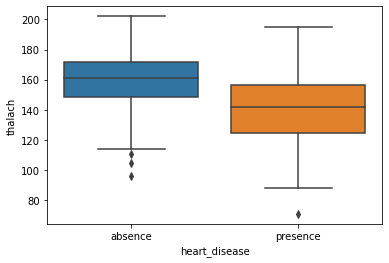

In [4]:
sns.boxplot(x = heart['heart_disease'], y = heart.thalach)
plt.show()

In [6]:
thalach_hd = heart.thalach[heart['heart_disease'] == 'presence']
print(thalach_hd)

1      108.0
2      129.0
6      160.0
8      147.0
9      155.0
       ...  
297    123.0
298    132.0
299    141.0
300    115.0
301    174.0
Name: thalach, Length: 139, dtype: float64


In [7]:
thalach_no_hd = heart.thalach[heart['heart_disease'] == 'absence']
print(thalach_no_hd)

0      150.0
3      187.0
4      172.0
5      178.0
7      163.0
       ...  
288    163.0
289    169.0
291    166.0
295    182.0
302    173.0
Name: thalach, Length: 164, dtype: float64


In [8]:
thalach_hd_mean = np.mean(thalach_hd)
#print(thalach_hd_mean) = 139.259
thalach_hd_median = np.median(thalach_hd)
#print(thalach_hd_median) = 142
thalach_no_hd_mean = np.mean(thalach_no_hd)
#rint(thalach_no_hd_mean) = 158.378
thalach_no_hd_median = np.median(thalach_no_hd)
#print(thalach_no_hd_median) = 161

In [10]:
mean_difference = np.abs(thalach_hd_mean - thalach_no_hd_mean)
print("Mean Difference: " + str(mean_difference))
median_difference = np.abs(thalach_hd_median - thalach_no_hd_median)
print("Median Difference: " + str(median_difference))

Mean Difference: 19.11905597473242
Median Difference: 19.0


<br>

<b>Null:</b> The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.

<b>Alternative:</b> The average `thalach` for a person with heart disease is NOT equal to the average `thalach` for a person without heart disease.

In [12]:
#use thalach_hd and thalach_no_hd
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print("{:.17f}".format(float(pval)))

0.00000000000003457


There is a significant difference between people with and without heart disease; we reject the null hypothesis.

<br>

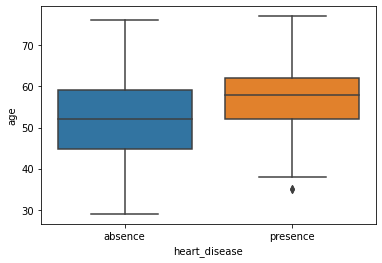

In [13]:
sns.boxplot(x = heart['heart_disease'], y = heart.age)
plt.show()

### Chest Pain and Max Heart Rate

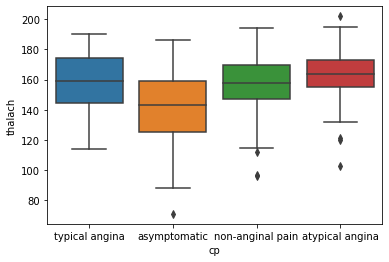

In [14]:
sns.boxplot(x = heart.cp, y = heart['thalach'])
plt.show()

In [15]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
#print(thalach_typical)
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
#print(thalach_asymptom)
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
#print(thalach_nonangin)
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']
#print(thalach_atypical)

<br>

<b>Null:</b> People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average `thalach`.

<b>Alternative:</b> People with typical angina, non-anginal pain, atypical angina, and asymptomatic people <b>do not</b> all have the same average `thalach`.

In [16]:
#we could use 6 separate 2 sample ttests, but it might cause a higher margin of type 1 error, so using ANOVA would be more efficent
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print("{:.13f}".format(float(pval)))

0.0000000001907


There is a significant difference between people with typical angina, non-anginal pain, atypical angina, and asymptomatic chest pain with the same avg thalach, than with those that do not; therefore, we reject the null hypothesis.

<br>

In [17]:
tukey_result= pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


Anything paired with `asymptomatic` is significantly different and we reject the null hypothesis that all the `cp` categories are similar to the average `thalach`.

<br>

### Heart Disease and Chest Pain

In [18]:
Xtab = pd.crosstab(heart.cp, heart['heart_disease'])
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [19]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print("{:.20f}".format(float(pval)))

0.00000000000000001252


There is a significant association between these variables, and the null hypothesis is rejected.